In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('summary.csv')

In [12]:
baseline = df.iloc[0]
print(baseline)

status                             ok
partition                           1
bench          baseline:gemm-baseline
bram_used                          44
dsp_used                            3
lut_used                         1535
lutmem_used                       137
reg_used                         2642
uram_used                           0
runtime_avg                   10.4164
runtime_std                0.00853253
Name: 0, dtype: object


In [13]:
info_keys = [ 
    'partition',
]
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

In [14]:
normalized_df = df.copy()
for key in keys:
    norm_val = baseline[key]
    normalized_df[key] = normalized_df[key].apply(lambda v: v / norm_val)
normalized_df = normalized_df[info_keys + keys]
print(normalized_df)

   partition   lut_used  lutmem_used  bram_used   dsp_used  reg_used  \
0          1   1.000000     1.000000   1.000000   1.000000  1.000000   
1          2   0.983713     0.912409   1.045455   2.000000  0.961014   
2          3   4.439739     2.985401   1.340909  11.333333  2.576836   
3          4   1.082736     0.912409   1.113636   4.000000  1.064724   
4          5   6.886645     4.248175   1.386364  18.666667  3.682816   
5          6   8.239739     4.788321   1.659091  22.333333  4.127555   
6          7   9.482085     5.583942   1.931818  26.000000  5.245269   
7          8   1.231922     0.919708   1.113636   8.000000  1.150643   
8          9  12.469707     6.941606   1.250000  33.333333  5.971991   
9         10  13.779805     7.386861   1.386364  37.000000  6.764951   

   runtime_avg  
0     1.000000  
1     0.640726  
2     1.106221  
3     0.647138  
4     1.062455  
5     0.983836  
6     1.043799  
7     0.653254  
8     1.065669  
9     1.005215  


In [15]:
long = pd.melt(normalized_df, id_vars=['partition'], var_name='metrics', value_name='values')
long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
partition    60 non-null int64
metrics      60 non-null object
values       60 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


Text(0.5, 0, 'Partitioning and Unrolling Factor')

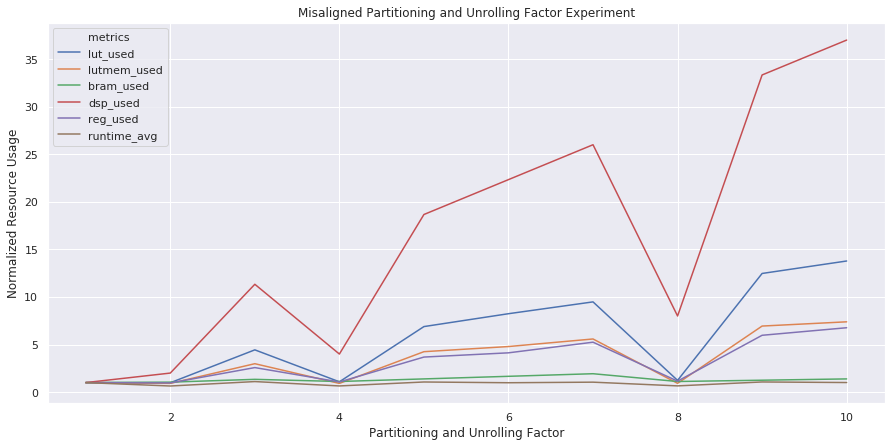

In [16]:
plt.figure(figsize=(15, 7))
plot = sns.lineplot(x='partition', y='values', hue='metrics', data=long)
plot.set_title('Misaligned Partitioning and Unrolling Factor Experiment')
plot.set_ylabel('Normalized Resource Usage')
plot.set_xlabel('Partitioning and Unrolling Factor')

In [17]:
plot.figure.savefig('normalized_resources.png', dpi=300)

Text(0.5, 0.07, 'Misalgined Partitioning and Unrolling - Absolute Resource Usages')

<Figure size 432x288 with 0 Axes>

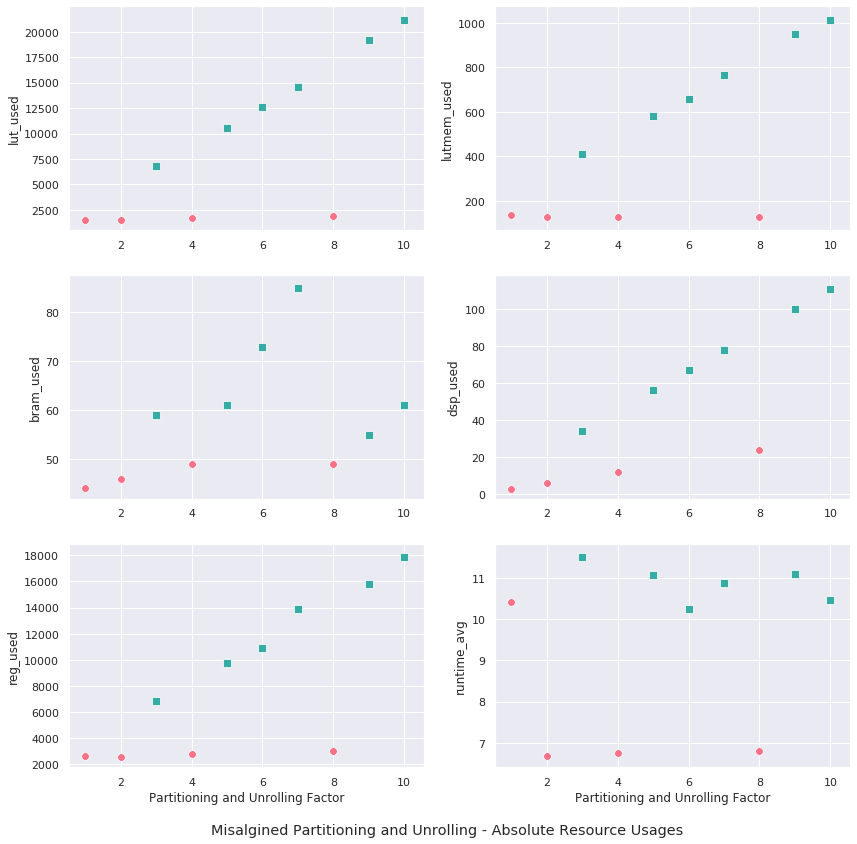

In [18]:
plt.figure()
sns.set()

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14))
pal = sns.color_palette('husl', 8)

for idx, key in enumerate(keys):
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    # Manually add each point to the current scatter plot.
    # This lets us control the color and shape of point.
    for i in range(len(df['partition'])):
        x = df['partition'][i]
        (mark, col) = ('o', pal[0]) if 128 % x == 0 else ('s', pal[4])
        sns.scatterplot(x=[x], y=[df[key][i]], marker=mark, s=20*3, color=col, ax=ax)
        ax.set_ylabel(key)
        
for col in range(cols):
    axes[rows - 1, col].set(xlabel='Partitioning and Unrolling Factor')
    
fig.suptitle('Misalgined Partitioning and Unrolling - Absolute Resource Usages', y=0.07)

In [ ]:
fig.savefig('absolute.png', dpi=300)